The Sparks Foundation Internship
GRIP(Graduate Rotational Internship Program) October 2022

Data Science and Business Analytics intern

AUTHOR :Saad Mukhtar Kazi

Task 2 :Prediction using Unsupervised Machine Learning

Problem Statement: From the given 'Iris' Dataset, predict the optimum numbers of clusters, and represent it visually.

In [1]:
## importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [5]:
## data:  https://bit.ly/3kXTdox

data= pd.read_csv("C:/Users/nawin/Downloads/Iris.csv")
data

## observation: Dataset read and displayed

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
## shape of data 
data.shape
## observation: The number of rows is 150 and columns is 6

(150, 6)

In [7]:
## columns name
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
## memory usage
data.memory_usage()

Index             128
Id               1200
SepalLengthCm    1200
SepalWidthCm     1200
PetalLengthCm    1200
PetalWidthCm     1200
Species          1200
dtype: int64

In [10]:
## descriptive statitics of Hours and Scores
## T-Transpose
data.describe().T
## observation: there are no missing values as all columns row count is same.

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [11]:
## duplicated values sum
data.duplicated().sum()
## observation : no duplicate values

0

<AxesSubplot:>

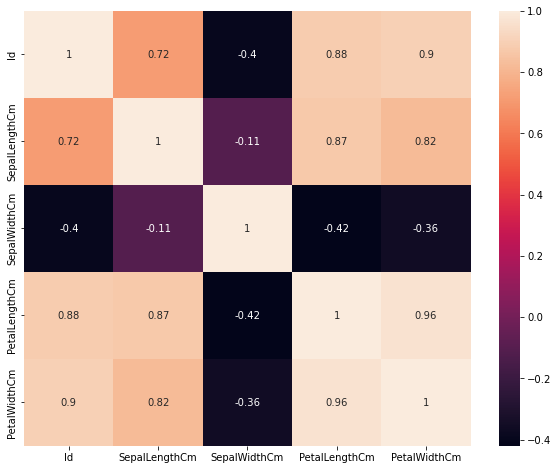

In [13]:
## Plotting heat map to check correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

Predicting the optimum number of clusters

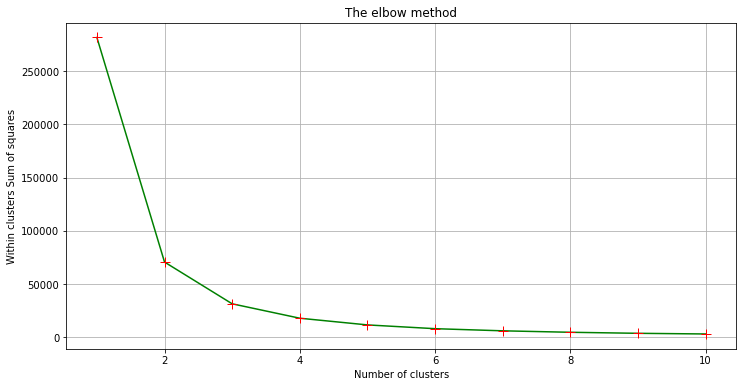

In [16]:
##  Finding the optimum number of clusters for k-means classification
##  splitting data
X = data.iloc[:, [0, 1, 2, 3]].values

wcss= []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,"g+",linestyle="solid",markeredgecolor="r",markersize=10)
plt.rcParams["figure.figsize"]=[15,8]
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within clusters Sum of squares') # Within cluster sum of squares(wcss)
plt.grid()
plt.show()

In [17]:
wcss

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17758.792503556186,
 11468.968747023808,
 7921.863473076924,
 5911.632365518541,
 4541.979023391813,
 3571.911095588235,
 2943.933100840336]

In [19]:
## Applying kmeans to the dataset 

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

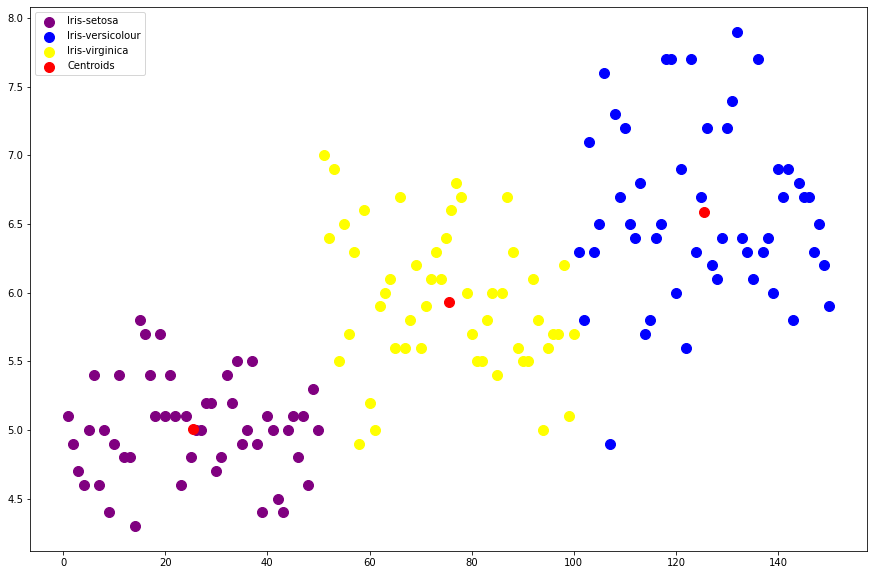

In [32]:
## Visualising the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.rcParams["figure.figsize"]=[15,15]
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()